# The Morris-Lecar Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from copy import copy
from scipy.integrate import odeint
from sympy import symbols, Eq, solve
from tqdm import tqdm
%matplotlib inline

In [2]:
# Morris Lecar parameters
g_L = 8
E_L = -80
g_Na = 20
E_Na = 60
g_K = 10
E_K = -90
V_n = -25
V_m = -20
k_n = 5
k_m = 15
C_m = 1
t = 1

# ionic gates
def m_inf(V): return 1/(1 + 2.71828**((V_m-V)/k_m))
def n_inf(V): return 1/(1 + 2.71828**((V_n-V)/k_n))
    
# neuron dynamics
def MLneuron(X, I):
    V, n = X
    dV = (I - g_L*(V-E_L) - g_K*n*(V-E_K) - g_Na*m_inf(V)*(V-E_Na))/C_m
    dn = (n_inf(V)-n)
    return dV, dn

---
### 1.

In [3]:
def phaseplane_and_nullclines(I, t_span):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    V, n = symbols('V n')
    eq1, eq2 = MLneuron([V, n], I)
    Vs = np.arange(-80, 20, 2)
    ns1 = []
    ns2 = []
    for v in tqdm(Vs):
        eq = Eq(eq1.subs(V, v), 0)
        sol1 = solve(eq,n)
        ns1.append(sol1)
        eq = Eq(eq2.subs(V, v), 0)
        sol2 = solve(eq,n)
        ns2.append(sol2)
    plt.plot(Vs, ns1)
    plt.plot(Vs, ns2)
    plt.title('$Nullclines$', fontsize=20)
    plt.xlabel('$Voltage (mV)$', fontsize=15)
    plt.ylabel('$n$', fontsize=15)
    plt.subplot(122)
    for i in tqdm(np.arange(-110, 50, 10)):
        for j in np.arange(-0.2, 0.8, 0.05):
            X0 = [i, j]
            X = odeint(lambda X,t: MLneuron(X, I), X0, t_span)
            V, n = X.T
            plt.plot(V, n, color='blue')
    plt.title('$Phase Plane$', fontsize=20)
    plt.xlabel('$Voltage (mV)$', fontsize=15)
    plt.ylabel('$n$', fontsize=15)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  5.33it/s]


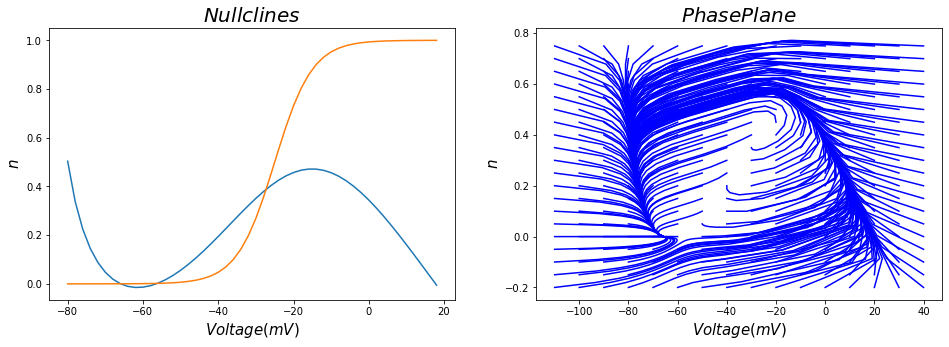

In [4]:
t_span = np.arange(1e-6, 100.0, 0.1) # time span
I = 0 # external current
phaseplane_and_nullclines(I, t_span)

---
### 2.

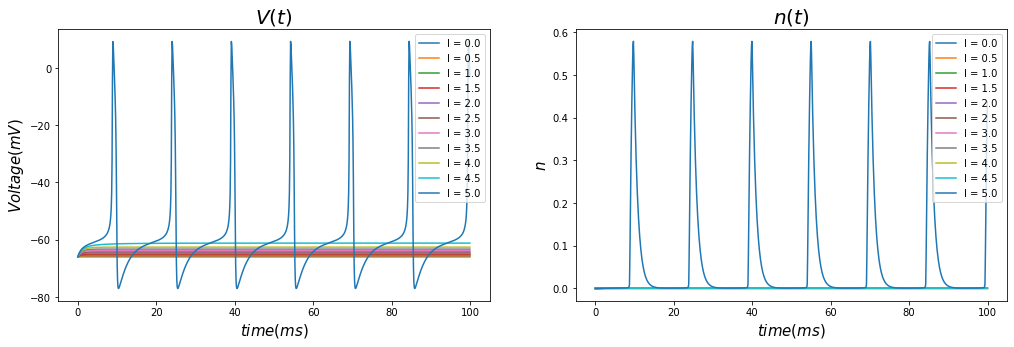

In [5]:
X0 = [-66, 0] # initial condition[V0,n0]
t_span = np.arange(1e-6, 100, 0.1) # time span
plt.figure(figsize=(17,5))
for I in np.arange(0, 5.1, 0.5):
    X = odeint(lambda X,t: MLneuron(X, I), X0, t_span)
    V, n = X.T
    plt.subplot(121)
    plt.plot(t_span, V, label='I = %s'%I)
    plt.xlabel('$time(ms)$', fontsize=15)
    plt.ylabel('$Voltage(mV)$',fontsize=15)
    plt.title('$V(t)$',fontsize=20)
    plt.legend()
    plt.subplot(122)
    plt.plot(t_span, n, label='I = %s'%I)
    plt.xlabel('$time(ms)$', fontsize=15)
    plt.ylabel('$n$',fontsize=15)
    plt.title('$n(t)$',fontsize=20)
    plt.legend()
    

---
### 3.

### below threshold

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  5.32it/s]


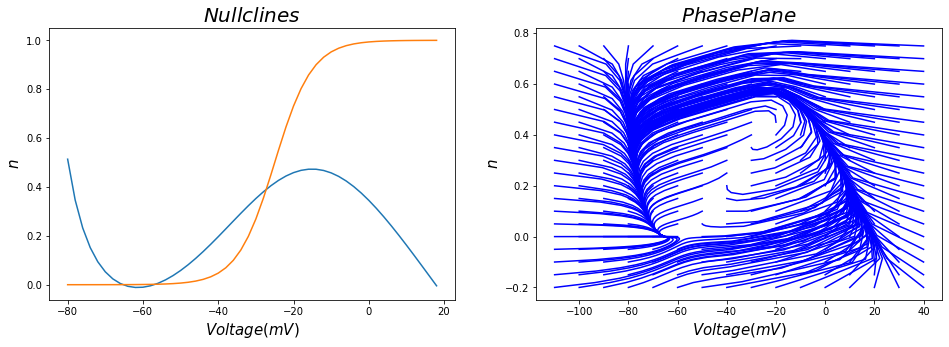

In [6]:
t_span = np.arange(1e-6, 100.0, 0.1) # time span
Ia = 1 # external current
phaseplane_and_nullclines(Ia, t_span)

### threshold

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:25<00:00,  1.57s/it]


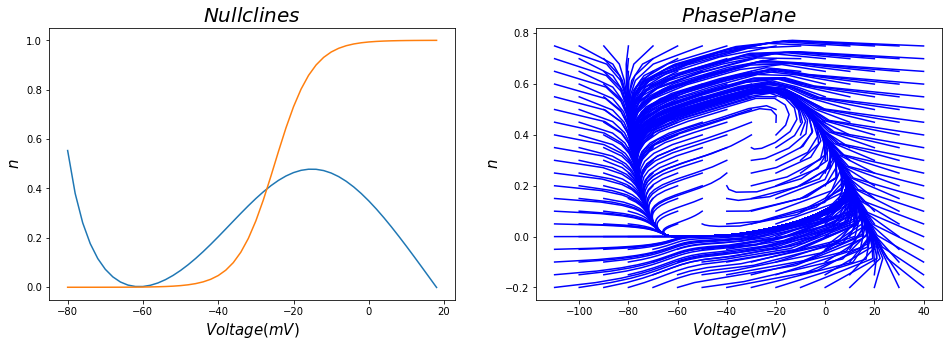

In [7]:
Ib = 5 # external current
phaseplane_and_nullclines(Ib, t_span)

### above threshold

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:57<00:00,  3.60s/it]


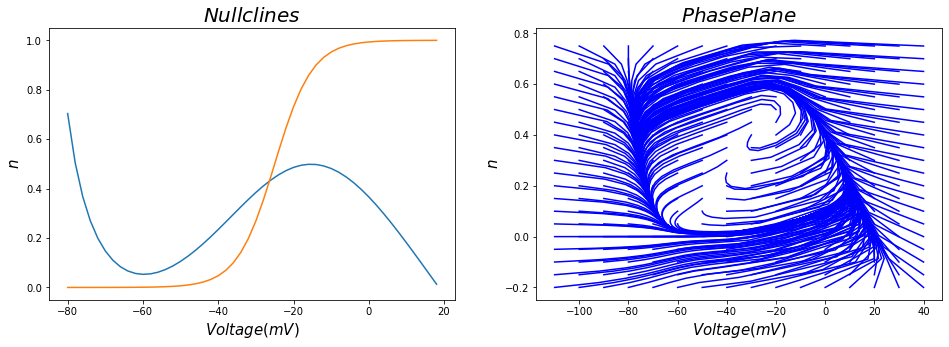

In [8]:
Ic = 20 # external current
phaseplane_and_nullclines(Ic, t_span)

---
### 4.

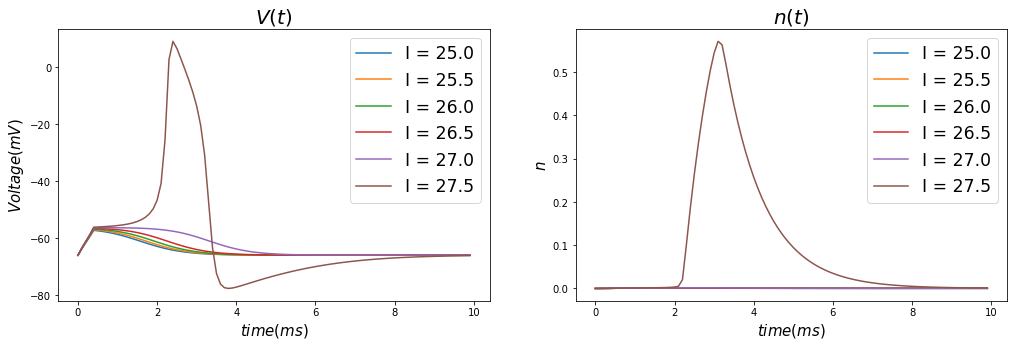

In [9]:
def I_kick(t,t1=0,t2=.4,A=30):
    tt = [0]
    return np.where((t>=t1)&(t<=t2),A,tt)

def MLneuron_impulse(X, t, I):
    V, n = X
    dV = (I(t) - g_L*(V-E_L) - g_K*n*(V-E_K) - g_Na*m_inf(V)*(V-E_Na))/C_m
    dn = (n_inf(V)-n)
    return dV, dn

X0 = [-66, 0] # initial condition[V0,n0]
t_span = np.arange(1e-6, 10.0, 0.1) # time span

plt.figure(figsize=(17,5))
for A in np.arange(25, 28, 0.5):
    I_in = lambda t: I_kick(t,t1=0,t2=.4,A=A)
    X = odeint(lambda X,t: MLneuron_impulse(X, t, I=I_in), X0, t_span)
    V, n = X.T
    plt.subplot(121)
    plt.plot(t_span, V, label='I = %s'%A)
    plt.xlabel('$time(ms)$', fontsize=15)
    plt.ylabel('$Voltage(mV)$',fontsize=15)
    plt.title('$V(t)$',fontsize=20)
    plt.legend(fontsize='xx-large')
    plt.subplot(122)
    plt.plot(t_span, n, label='I = %s'%A)
    plt.xlabel('$time(ms)$', fontsize=15)
    plt.ylabel('$n$',fontsize=15)
    plt.title('$n(t)$',fontsize=20)
    plt.legend(fontsize='xx-large')   

---
<div align=center><font  size="4" color='grey'>end</font></div>

---